### 多项式回归升维实战（一）

#### 升维的方式：用已知的维度进行相乘或者进行自乘

#### 升维:是将特征进行增加，有一个二维数组，但是它的只有一列，那么它就只有一维的特征，可以称为一维,这里的一维是指一维的特征

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### 创建数据

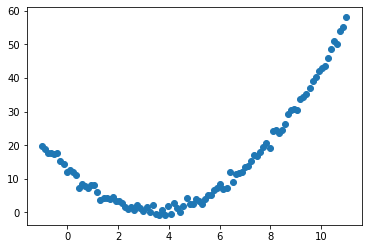

In [2]:
# 创建等差数列  返回-1到11之间的100个样本
X = np.linspace(-1, 11, num=100)  # 一维
y = (X - 5)**2 + 3*X - 12 + np.random.randn(100)  # 这里的y为一元二次方程，所以会是弯曲的曲线
X = X.reshape(-1, 1)  # 将数据变为二维数据  机器学习需要二维的数据
plt.scatter(X, y)
# display(X, y)
# X.shape
# X
# y

#### 预测

In [3]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

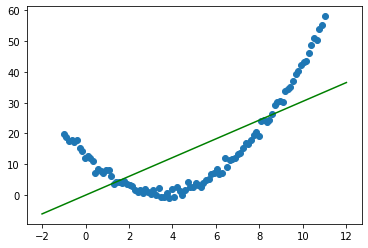

In [4]:
# 数据的验证
X_test = np.linspace(-2, 12, 300).reshape(-1, 1)
model.fit(X, y)  # 进行训练
y_pred = model.predict(X_test)
# 原来的数据的图形
plt.scatter(X, y)
# 预测数据图形
plt.plot(X_test, y_pred, color='green')
# X_test

#### 升维 升为二维

In [43]:
np.set_printoptions(suppress=True)
X2 = np.concatenate([X, X**2], axis=1)
# display(X2, y)
# X2
# 目标值y不需要进行处理
model.fit(X2, y)
# 进行预测
# 将预测的数据进行升维
X_test_ = np.concatenate([X_test, X_test**2], axis=1)
y_pred = model.predict(X_test_)
plt.scatter(X, y)  # 散点图
plt.plot(X_test, y_pred, color='red')  # 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 4)

In [6]:
# 系数
model.coef_

array([-6.8943276 ,  0.99417252])

In [7]:
# 截距
model.intercept_

12.660996823029063

### 升维

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
# 使用PolynomialFeatures进行升维 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#### 创建数据

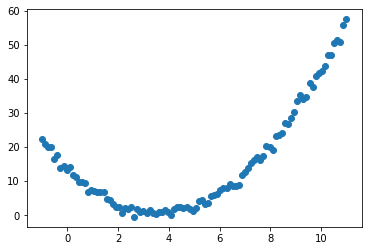

In [9]:
# 创建等差数列  返回-1到11之间的100个样本
X = np.linspace(-1, 11, num=100)  # 一维
y = (X - 5)**2 + 3*X - 12 + np.random.randn(100)  # 这里的y为一元二次方程，所以会是弯曲的曲线
X = X.reshape(-1, 1)  # 将数据变为二维数据  机器学习需要二维的数据
plt.scatter(X, y)

In [10]:
# 测试数据
X_test = np.linspace(-2, 12, 300).reshape(-1, 1)

In [9]:
# 进行升维 默认是2次幂
ploy = PolynomialFeatures()
X2 = ploy.fit_transform(X)
# 测试数据进行升维
X_test_ = ploy.fit_transform(X_test)
# X2.shape  # 三维
# X_test

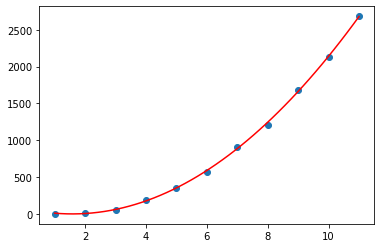

In [10]:
# 进行训练
model = LinearRegression()
model.fit(X2, y)
y_pred = model.predict(X_test_)
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')

# 天猫双十一数据线性回归预测

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
# 从2009年到2020年11年之间的数据变化，单位为(亿元)  arange() 函数 左闭右开
X = np.arange(2009,2020).reshape(-1, 1)-2008 
# 目标值
y = np.array([0.5,9.36,52,191,350,571,912,1207,1682,2135,2684])

In [4]:
# linspace()函数： 左闭右闭
X_test = np.linspace(2009, 2019, num=50).reshape(-1, 1)-2008   # 进行训练时需要将数据转为二维数据
# display(X, y)

In [17]:
# 对数据进行升维
poly = PolynomialFeatures(degree=3)
X_2 = poly.fit_transform(X)
print(X_2.shape)
X_test_ = poly.fit_transform(X_test)

(11, 4)


### 训练

#### 使用线性回归 LinearRegression

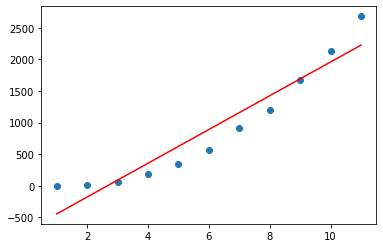

In [18]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)
plt.scatter(X, y)
# 这里的x需要使用原始的值  y是预测的值
plt.plot(X_test, y_pred, color='red')

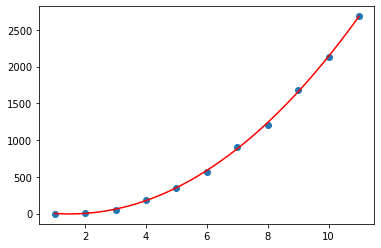

In [19]:
# print(X_test_.shape)
model.fit(X_2, y)
y_pred_2 = model.predict(X_test_)
plt.scatter(X, y)
plt.plot(X_test, y_pred_2, color='red')

#### 使用随机梯度下降 SGDRegressor

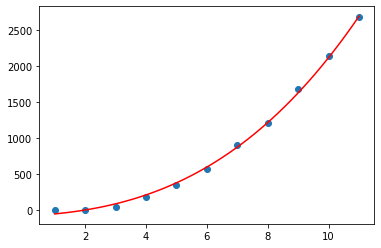

In [28]:
# 数据归一化处理
std = StandardScaler()
# 在进行归一化处理时，需要对升维之后的数据进行归一化，不是原数据
X_norm = std.fit_transform(X_2)
# X_test_norm = std.fit_transform(X_test_)
X_test_norm = std.transform(X_test_)
sgd = SGDRegressor(max_iter=10000, eta0=0.3, penalty='l2')
sgd.fit(X_norm, y)
y_pred = sgd.predict(X_test_norm)
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')

## 预测中国人寿保险保费

#### 加载数据

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
# 导入0均值归一化和升维
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [33]:
data = pd.read_excel('中国人寿.xlsx')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='charges', ylabel='Density'>

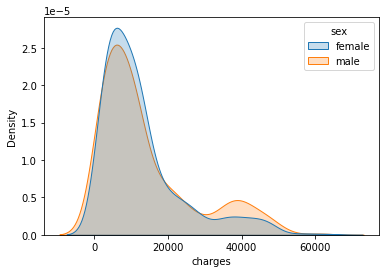

In [38]:
# 性别对于保费的影响
sns.kdeplot(data['charges'], shade=True, hue=data['sex'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

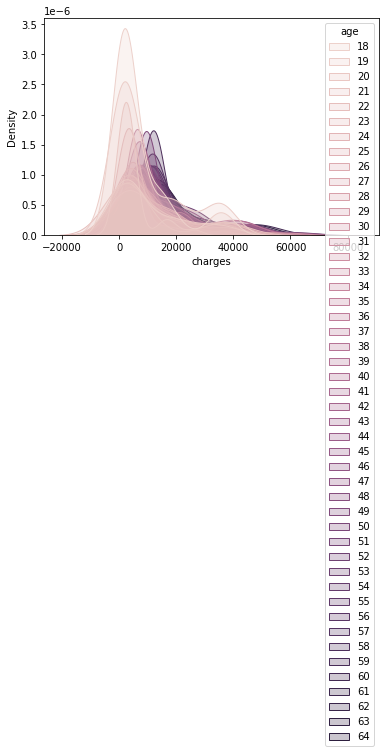

In [39]:
# 年龄对于保费的影响
sns.kdeplot(data['charges'], shade=True, hue=data['age'])

e:\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

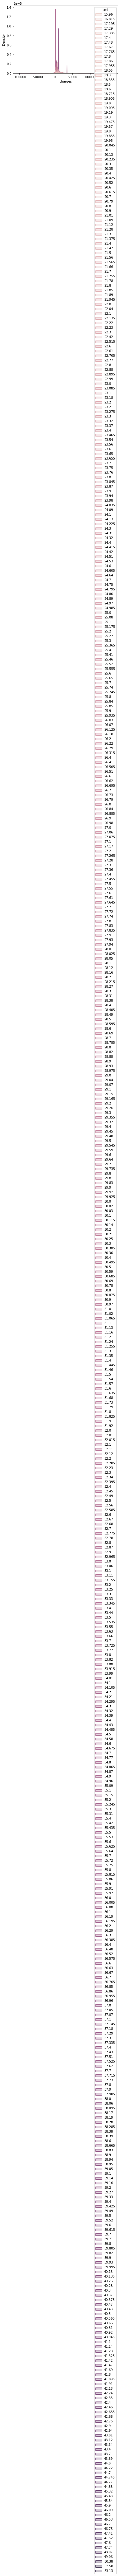

In [40]:
# 体重对于保费的影响
sns.kdeplot(data['charges'], shade=True, hue=data['bmi'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

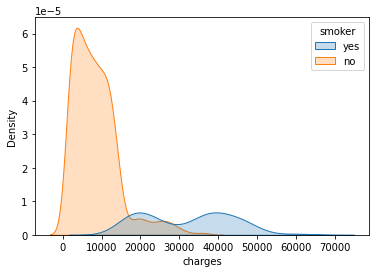

In [41]:
# 是否吸烟对于保费的影响
sns.kdeplot(data['charges'], shade=True, hue=data['smoker'])